**Analisis y procesamiento de los datos de espectro recolectados**

In [188]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.constants import h, c, k


#Funcion para lectura de los espectros 
def open_espec(route, mode = 'r'):
    """
    route : ruta del archivo del espectro type(string)
    mode : predefinido read (r)
    """
    arc = open(route, mode)
    l = arc.readlines()
    espec = []
    for i in np.arange(len(l)):
        t = np.fromstring(l[i], dtype = int, sep = " ")
        espec.append(t)
    
    return espec

In [230]:
#Cargue de Archivos

#MUUA
esp_A = np.array([open_espec('esp_data\esp_X50__24_05_2023__13_34_35_muua.txt', 'r')], dtype = 'object')[0]

#Bosque Plaza
esp_B = np.array([open_espec('esp_data\esp_X49_23_05_2023__12_30_31_bosqueplaza.txt', 'r')], dtype = 'object')[0]

#Picacho
esp_C = np.array([open_espec('esp_data\esp_X53__23_05_2023__14_59_15_picacho.txt', 'r')], dtype = 'object')[0]

#Extraterrestrial_Solar_Spectrum
solar_ref_ext = pd.read_excel('WMO_Wehrli_ref_solar_spectra_AM0.xls', header=0)
solar_ref_ext.columns = ['wv', 'extrater']

#Surface_Solar_Spectrum
solar_ref_sfc = pd.read_excel('ASTM G173-03_Ref_Solar_spectra_AM1.5.xls', header = 0)
solar_ref_sfc.columns = ['wv', 'etr', 'global', 'circumsolar']

#Wavelenght for Espectral_data
N = 288
wv = np.arange(N)*2.3548+321.47

[]

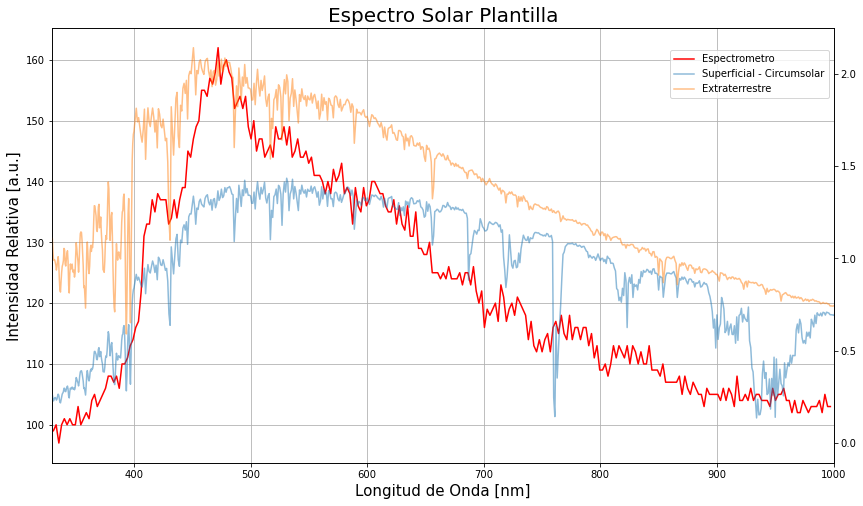

In [231]:
#Formato de Graficación de Espectros

fig, ax = plt.subplots(figsize = (14,8))

ax.plot(wv, esp_C[1][0:-1], 'r', label = 'Espectrometro')


ax2 = ax.twinx()
ax2.plot(solar_ref_sfc.wv, solar_ref_sfc.circumsolar, alpha = 0.5, label = 'Superficial - Circumsolar')
ax2.plot(solar_ref_sfc.wv, solar_ref_sfc.etr, alpha = 0.5, label = 'Extraterrestre')

ax.set_xlim(330, 1000)           #Rango de Respuesta Espectral del dispositivo
ax.set_xlabel('Longitud de Onda [nm]', size = 15), ax.set_ylabel('Intensidad Relativa [a.u.]', size = 15)
ax.set_title('Espectro Solar Plantilla', size = 20)


ax.grid()
fig.legend(loc = 'upper right', bbox_to_anchor = (0.9,0.85))


plt.plot()

In [ ]:
arc.close()

**REFERNCES**

https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html

https://www.astm.org/g0173-03r20.html